# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.dummy import DummyRegressor

from datetime import datetime

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
df.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [5]:
df_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14149 entries, 0 to 14148

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                14149 non-null  object 

 1   final.output.concentrate_ag                         14148 non-null  float64

 2   final.output.concentrate_pb                         14148 non-null  float64

 3   final.output.concentrate_sol                        13938 non-null  float64

 4   final.output.concentrate_au                         14149 non-null  float64

 5   final.output.recovery                               14149 non-null  float64

 6   final.output.tail_ag                                14149 non-null  float64

 7   final.output.tail_pb                                14049 non-null  float64

 8   final.output.tail_sol                               14144 non-n

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5290 entries, 0 to 5289

Data columns (total 53 columns):

 #   Column                                      Non-Null Count  Dtype  

---  ------                                      --------------  -----  

 0   date                                        5290 non-null   object 

 1   primary_cleaner.input.sulfate               5286 non-null   float64

 2   primary_cleaner.input.depressant            5285 non-null   float64

 3   primary_cleaner.input.feed_size             5290 non-null   float64

 4   primary_cleaner.input.xanthate              5286 non-null   float64

 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64

 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64

 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64

 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64

 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64

 1

### Проверка подсчета эффективности обогащения

In [8]:
print(df_train['rougher.output.recovery'])

0        87.107763

1        86.843261

2        86.842308

3        87.226430

4        86.688794

           ...    

14144    89.574376

14145    87.724007

14146    88.890579

14147    89.858126

14148    89.514960

Name: rougher.output.recovery, Length: 14149, dtype: float64


In [9]:
def recovery(column):
    C = column['rougher.output.concentrate_au'] # доля золота в концентрате после флотации/очистки
    F = column['rougher.input.feed_au'] # доля золота в сырье/концентрате до флотации/очистки
    T = column['rougher.output.tail_au'] # доля золота в отвальных хвостах после флотации/очистки
    return (C*(F-T))/(F*(C-T))*100  

print('MAE =', mean_absolute_error(recovery(df_train), df_train['rougher.output.recovery']))

MAE = 9.73512347450521e-15


#### Вывод

В среднем ошибка наших расчетов от данных из таблицы скачет на +/- 3.58. 

### Анализ признаков, недоступных в тестовой выборке

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 19439 entries, 0 to 19438

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                19439 non-null  object 

 1   final.output.concentrate_ag                         19438 non-null  float64

 2   final.output.concentrate_pb                         19438 non-null  float64

 3   final.output.concentrate_sol                        19228 non-null  float64

 4   final.output.concentrate_au                         19439 non-null  float64

 5   final.output.recovery                               19439 non-null  float64

 6   final.output.tail_ag                                19438 non-null  float64

 7   final.output.tail_pb                                19338 non-null  float64

 8   final.output.tail_sol                               19433 non-n

In [11]:
df_train_excluded = df_train.drop(df_test.columns, axis=1)

df_train.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 14149 entries, 0 to 14148

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype  

---  ------                                              --------------  -----  

 0   date                                                14149 non-null  object 

 1   final.output.concentrate_ag                         14148 non-null  float64

 2   final.output.concentrate_pb                         14148 non-null  float64

 3   final.output.concentrate_sol                        13938 non-null  float64

 4   final.output.concentrate_au                         14149 non-null  float64

 5   final.output.recovery                               14149 non-null  float64

 6   final.output.tail_ag                                14149 non-null  float64

 7   final.output.tail_pb                                14049 non-null  float64

 8   final.output.tail_sol                               14144 non-n

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 5290 entries, 0 to 5289

Data columns (total 53 columns):

 #   Column                                      Non-Null Count  Dtype  

---  ------                                      --------------  -----  

 0   date                                        5290 non-null   object 

 1   primary_cleaner.input.sulfate               5286 non-null   float64

 2   primary_cleaner.input.depressant            5285 non-null   float64

 3   primary_cleaner.input.feed_size             5290 non-null   float64

 4   primary_cleaner.input.xanthate              5286 non-null   float64

 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64

 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64

 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64

 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64

 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64

 1

#### Вывод 

Для тестовой выборки недоступны:
* тип параметра `calculation`, расчетные хар-ки.
* финальный этап обработки `final`

### Предобработка данных

In [13]:
#2016-09-01 00:59:59

df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

Разберемся с пропусками.

In [14]:
df_train.isna().sum().sort_values(ascending=False).head(15)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
dtype: int64

In [15]:
df_train.isna().sum().sum()

4100

In [16]:
df_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Так как нам важно, чтобы модель обучалась на выборке без пропусков, то пока займемся пропусками в обучающем датафрейме.

In [17]:
# Создадим функцию заполнения пропусков в диапазоне минимального и максимального значения колонки

def to_fillna(data, column):
    values = np.random.uniform(0, data[column].max())
    
    data[column] = data[column].fillna(method='ffill')

In [18]:
# Создадим цикл, который будет заполнять пропуски в каждой колонке

for column in df_train.columns:
    if df_train[column].count() < 14149:
        to_fillna(df_train, column)
        
for column in df_test.columns:
    if df_test[column].count() < 5290:
        to_fillna(df_test, column)
        
for column in df.columns:
    if df[column].count() < 19439:
        to_fillna(df, column)

In [19]:
print('Пропуски в обучающей выборке', df_train.isna().sum().sum())
print('Пропуски в тестовой выборке', df_test.isna().sum().sum())
print('Пропуски в полной таблице', df.isna().sum().sum())
print('Дубликаты в обучающей выборке', df_train.duplicated().sum())

Пропуски в обучающей выборке 0

Пропуски в тестовой выборке 0

Пропуски в полной таблице 0

Дубликаты в обучающей выборке 0


In [20]:
# Также удалим ненужную колонку
df_train = df_train.drop(['date'], axis=1)

#### Вывод

Все, избавились от всех пропусков. Можно приступать к следующему шагу. И убрали ненужный столбец.

## Анализ данных

###  Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [21]:
# Создадим одну плоскость x
x = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']

# Саисок со средним значением концентрации серебра на каждом этапе очистки
y_ag = [df['rougher.output.concentrate_ag'].mean(), df['primary_cleaner.output.concentrate_ag'].mean(),
       df['final.output.concentrate_ag'].mean()]

# Саисок со средним значением концентрации золота на каждом этапе очистки
y_au = [df['rougher.output.concentrate_au'].mean(), df['primary_cleaner.output.concentrate_au'].mean(),
       df['final.output.concentrate_au'].mean()]

# Саисок со средним значением концентрации свинца на каждом этапе очистки
y_pb = [df['rougher.output.concentrate_pb'].mean(), df['primary_cleaner.output.concentrate_pb'].mean(),
        df['final.output.concentrate_pb'].mean()]

metal = ['Au', 'Pb', 'Ag']
stage = ['Rougher', 'Primary', 'Final']

([<matplotlib.axis.XTick at 0x7f651d528a60>,
 [Text(0.0, 0, 'Rougher'), Text(1.0, 0, 'Primary'), Text(2.0, 0, 'Final')])

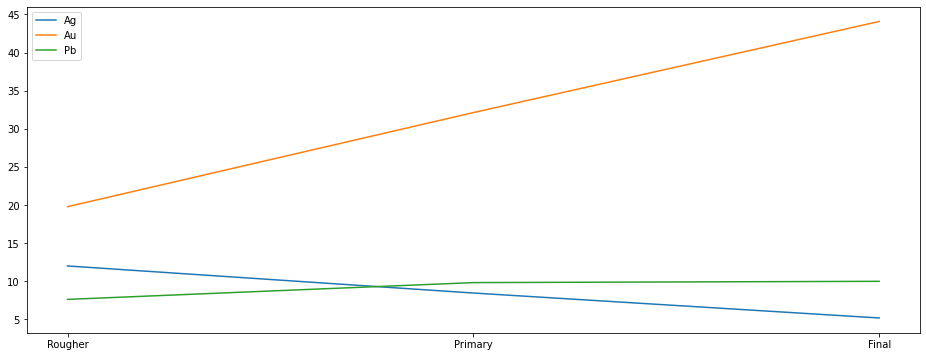

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))

plt.plot(x, y_ag, label='Ag')
plt.plot(x, y_au, label='Au')
plt.plot(x, y_pb, label='Pb')

plt.legend()

plt.xticks(x, stage)

#### Вывод

* Концентрация серебра к финальному этапу уменьшается
* Концентрация золота к финальному этапу увеличивается
* Концентрация Pb к финальному этапу слабо увеличивается

### Распределение гранул сырья в обучающей и тестовой выборке

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


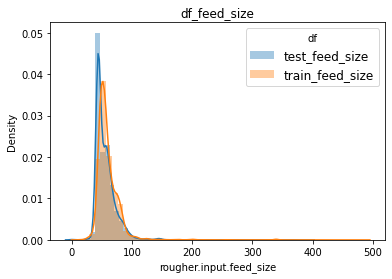

In [23]:
sns.distplot(df_test['rougher.input.feed_size'],
            hist=True, kde=True,
            label='test_feed_size')
plt.title('df_feed_size')
plt.legend(title='df', prop={'size': 12})
sns.distplot(df_train['rougher.input.feed_size'],
            hist=True, kde=True,
            label='train_feed_size')
plt.legend(title='df', prop={'size': 12})

#### Вывод

Распределения не сильно отличаются, значит, и модель будет предсказывать нормально.

### Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 19439 entries, 0 to 19438

Data columns (total 87 columns):

 #   Column                                              Non-Null Count  Dtype         

---  ------                                              --------------  -----         

 0   date                                                19439 non-null  datetime64[ns]

 1   final.output.concentrate_ag                         19439 non-null  float64       

 2   final.output.concentrate_pb                         19439 non-null  float64       

 3   final.output.concentrate_sol                        19439 non-null  float64       

 4   final.output.concentrate_au                         19439 non-null  float64       

 5   final.output.recovery                               19439 non-null  float64       

 6   final.output.tail_ag                                19439 non-null  float64       

 7   final.output.tail_pb                                19439 non-null  float64       

In [25]:
# Создадим переменные с суммой концентрации всех веществ на каждом этапе
rougher_input = (df['rougher.input.feed_ag'] + df['rougher.input.feed_pb'] + 
                df['rougher.input.feed_au'])

rougher_output_concentrate = (df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb'] +
                      df['rougher.output.concentrate_au'])

final_concentrate = (df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] +
                    df['final.output.concentrate_au'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level funct

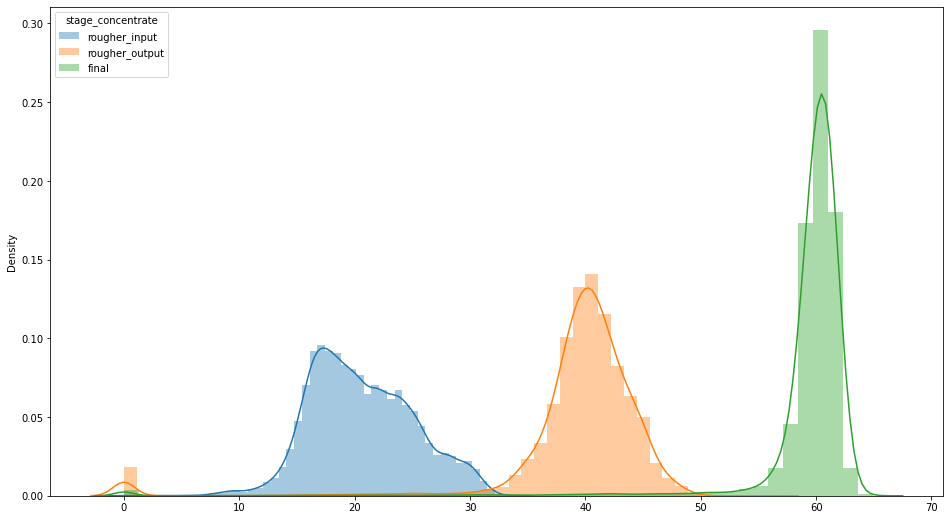

In [26]:
# График распределения

plt.figure(figsize=(16, 9))

ax = sns.distplot(rougher_input, label='rougher_input')
plt.legend(title='stage_concentrate')
ax = sns.distplot(rougher_output_concentrate, label='rougher_output')
plt.legend(title='stage_concentrate')
ax = sns.distplot(final_concentrate, label='final')
plt.legend(title='stage_concentrate')

#### Вывод

Виден выброс значений около нуля. ~~Эти выбросы не такие сильные, поэтому можно оставить.~~ Эти выбросы (у чернового концентрата) могут повлиять на обучение модели, поэтому лучше удалить.

In [27]:
df_train['rougher.output.concentrate_ag'] = df_train[df_train['rougher.output.concentrate_ag'] >= 1]
df_train['rougher.output.concentrate_pb'] = df_train[df_train['rougher.output.concentrate_pb'] >= 1]
df_train['rougher.output.concentrate_au'] = df_train[df_train['rougher.output.concentrate_au'] >= 1]

df_train = df_train[df_train['final.output.concentrate_ag'] >= 1]
df_train = df_train[df_train['final.output.concentrate_pb'] >= 1]
df_train = df_train[df_train['final.output.concentrate_au'] >= 1]

df = df[df['rougher.output.concentrate_ag'] >= 1]
df = df[df['rougher.output.concentrate_pb'] >= 1]
df = df[df['rougher.output.concentrate_au'] >= 1]

df= df[df['final.output.concentrate_ag'] >= 1]
df = df[df['final.output.concentrate_pb'] >= 1]
df = df[df['final.output.concentrate_au'] >= 1]

In [28]:
rougher_input = (df['rougher.input.feed_ag'] + df['rougher.input.feed_pb'] + 
                df['rougher.input.feed_au'])

rougher_output_concentrate = (df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb'] +
                      df['rougher.output.concentrate_au'])

final_concentrate = (df['final.output.concentrate_ag'] + df['final.output.concentrate_pb'] +
                    df['final.output.concentrate_au'])

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level funct

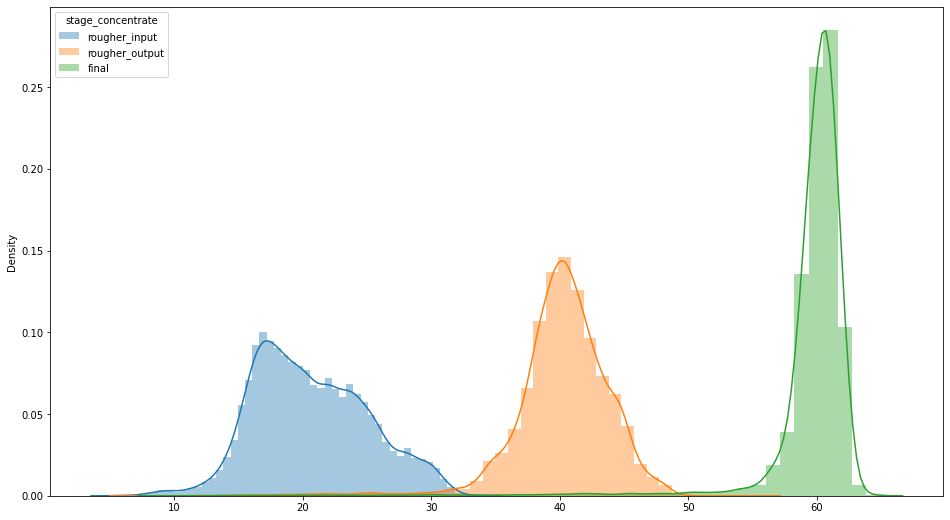

In [29]:
plt.figure(figsize=(16, 9))

ax = sns.distplot(rougher_input, label='rougher_input')
plt.legend(title='stage_concentrate')
ax = sns.distplot(rougher_output_concentrate, label='rougher_output')
plt.legend(title='stage_concentrate')
ax = sns.distplot(final_concentrate, label='final')
plt.legend(title='stage_concentrate')

## Модель

### Функция для вычисления итоговой sMAPE

In [30]:
# создадим функцию подсчета smape
def smape(target, predictions):
    return 1/len(target) * np.sum(np.abs(target - predictions) / ((np.abs(target) + np.abs(predictions)) / 2)) * 100

smape_scorer = make_scorer(smape, greater_is_better=False)

### Обучение моделей и оценка их качества кросс-валидацией

In [31]:
# Создадим список с необходимымми колонками для редактирования колонок в df_train
list_columns_rougher = df_test.columns.values.tolist()
list_columns_rougher.append('rougher.output.recovery')

list_columns_final = df_test.columns.values.tolist()
list_columns_final.append('final.output.recovery')

df_train_rougher = df_train[df_train.columns.intersection(list_columns_rougher)]
df_train_final = df_train[df_train.columns.intersection(list_columns_final)]

In [32]:
# Делим на признаки и таргеты: стадии флатации и финальной
features_rougher = df_train_rougher.drop(['rougher.output.recovery'], axis=1)
target_rougher = df_train_rougher['rougher.output.recovery']

features_final = df_train_final.drop(['final.output.recovery'], axis=1)
target_final = df_train_final['final.output.recovery']

# Выделим отдельно признаки для стадии флоатции
features_train_rghr, features_valid_rghr, target_train_rghr, target_valid_rghr = train_test_split(features_rougher,
                                                                                                  target_rougher,
                                                                                                  test_size=.25,
                                                                                                  random_state=12345)

# Отдельно признаки для финальной стадии
features_train_fnl, features_valid_fnl, target_train_fnl, target_valid_fnl = train_test_split(features_final,
                                                                                             target_final,
                                                                                             test_size=.25,
                                                                                             random_state=12345)

In [33]:
# создадим сетку для GridSearchCV

grid = {
    'max_depth': range(1, 500, 10),
    'random_state': [12345]
}

In [34]:
%%time

# Производим подбор параметром при помощи GridSearchCV и обучаем модель
dcsn_tree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=12345),
                        param_grid=grid,
                        cv=5,
                        scoring=smape_scorer)

dcsn_tree.fit(features_train_rghr, target_train_rghr)

print("Оценка лучшей модели: ", dcsn_tree.best_score_)
print("Лучшие параметры: ", dcsn_tree.best_params_)

Оценка лучшей модели:  -7.795371616968642

Лучшие параметры:  {'max_depth': 11, 'random_state': 12345}

CPU times: user 3min 23s, sys: 86.3 ms, total: 3min 23s

Wall time: 3min 27s


In [35]:
%%time

grid_rfc = {
    'n_estimators': range(1, 100, 20),
    'max_depth': range(1, 20, 5)    
}

rfc_model = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=12345),
                        param_distributions=grid_rfc,
                        cv=3,
                        scoring=smape_scorer,
                        n_jobs=-1,
                        random_state=12345)

rfc_model.fit(features_train_rghr, target_train_rghr)

print("Оценка лучшей модели: ", rfc_model.best_score_)
print("Лучшие параметры: ", rfc_model.best_params_)

Оценка лучшей модели:  -8.185698787729985

Лучшие параметры:  {'n_estimators': 21, 'max_depth': 16}

CPU times: user 2min 52s, sys: 151 ms, total: 2min 52s

Wall time: 2min 56s


In [36]:
lnr_model = LinearRegression()

lnr_model.fit(features_train_rghr, target_train_rghr)

predictions_rghr = lnr_model.predict(features_valid_rghr)

print("Оценка лучшей модели: ", smape(target_valid_rghr, predictions_rghr))

Оценка лучшей модели:  10.222229207321922


In [37]:
%%time

param_final = {
    'max_depth': range(1, 500, 10),
    'random_state': [12345]
}

dcsn_tree_fnl = GridSearchCV(estimator=DecisionTreeRegressor(random_state=12345),
                            param_grid=param_final,
                            cv=5,
                            scoring=smape_scorer)

dcsn_tree_fnl.fit(features_train_fnl, target_train_fnl)

print("Оценка лучшей модели (финальной): ", dcsn_tree_fnl.best_score_)
print("Лучшие параметры: ", dcsn_tree_fnl.best_params_)

Оценка лучшей модели (финальной):  -7.674096807792855

Лучшие параметры:  {'max_depth': 11, 'random_state': 12345}

CPU times: user 3min 10s, sys: 87.6 ms, total: 3min 11s

Wall time: 3min 14s


In [38]:
rfc_model_fnl = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=12345),
                        param_distributions=grid_rfc,
                        cv=3,
                        scoring=smape_scorer,
                        n_jobs=-1,
                        random_state=12345)

rfc_model_fnl.fit(features_train_fnl, target_train_fnl)

print("Оценка лучшей модели (финальной): ", rfc_model_fnl.best_score_)
print("Лучшие параметры: ", rfc_model_fnl.best_params_)

Оценка лучшей модели (финальной):  -6.372652020553493

Лучшие параметры:  {'n_estimators': 21, 'max_depth': 16}


In [39]:
lnr_model = LinearRegression()

lnr_model.fit(features_train_rghr, target_train_rghr)

predictions_rghr = lnr_model.predict(features_valid_rghr)

print("Оценка лучшей модели: ", smape(target_valid_rghr, predictions_rghr))

Оценка лучшей модели:  10.222229207321922


In [40]:
lnr_model_fnl = LinearRegression()

lnr_model_fnl.fit(features_train_fnl, target_train_fnl)

predictions_fnl = lnr_model_fnl.predict(features_valid_fnl)

print("Оценка лучшей модели (финальной): ", smape(target_valid_fnl, predictions_fnl))

Оценка лучшей модели (финальной):  7.998764573818799


Для предсказания извлечения руды после флотации будем использовать метод **случайного леса**. А для предсказания эффективности извлечения руды после последней стадии будем использовать метод **решающего древа**.

In [41]:
rfc_model = RandomForestRegressor(max_depth=16, n_estimators=21, random_state=12345)

rfc_model.fit(features_train_rghr, target_train_rghr)
rfc_predictions_rghr = rfc_model.predict(features_valid_rghr)

print('sMAPE модели по методу решающего древа', smape(target_valid_rghr, rfc_predictions_rghr))

sMAPE модели по методу решающего древа 8.05627158710206


In [42]:
dcsn_model = DecisionTreeRegressor(max_depth=11, random_state=12345)

dcsn_model.fit(features_train_fnl, target_train_fnl)
dcsn_predictions_fnl = dcsn_model.predict(features_valid_fnl)

print('sMAPE модели по методу случайного леса (финального концентрата)', smape(target_valid_fnl, dcsn_predictions_fnl))

sMAPE модели по методу случайного леса (финального концентрата) 7.507696824208853


**Соединение таргета из полной таблицы с тестовой таблицей**

In [43]:
# Соединим целевевые признаки из полной таблицы с тестовой таблицей
df_test_merge = pd.merge(df_test, df[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         on='date', how='left')

# удалим ненужную колонку, т.к. мешает в обучении машины
df_test_merge = df_test_merge.drop(['date'], axis=1)

**Делаем предсказания на тестовой выборке**

In [44]:
# Делим выборку на признаки и целевой признак
features_rougher_test = df_test_merge.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_rougher_test = df_test_merge['rougher.output.recovery']

features_final_test = df_test_merge.drop(['final.output.recovery', 'rougher.output.recovery'], axis=1)
target_final_test = df_test_merge['final.output.recovery']

In [45]:
# Предсказываем на тестовой выборке
predictions_rghr_test = dcsn_model.predict(features_rougher_test)
predictions_final_test = rfc_model.predict(features_final_test)

# Считаем sMAPE
smape_rghr = smape(target_rougher_test, predictions_rghr_test)
smape_fnl = smape(target_final_test, predictions_final_test)

print('sMAPE стадии флотации', smape_rghr)
print('sMAPE финальной стадии', smape_fnl)
print('Итоговое sMAPE:', .25*smape_rghr + .75*smape_fnl)

sMAPE стадии флотации 24.668443664872793

sMAPE финальной стадии 17.535573073198872

Итоговое sMAPE: 19.318790721117352


In [46]:
dummy_mean_rghr = DummyRegressor(strategy = 'mean').fit(features_train_rghr, target_train_rghr)
dummy_mean_fnl = DummyRegressor(strategy = 'mean').fit(features_train_fnl, target_train_fnl)

predict_dummy_mean_rghr = dummy_mean_rghr.predict(features_rougher_test)
predict_dummy_mean_fnl = dummy_mean_fnl.predict(features_final_test)

smape_dummy_rghr = smape(target_rougher_test, predict_dummy_mean_rghr)
smape_dummy_fnl = smape(target_final_test, predict_dummy_mean_fnl)

print('sMAPE стадии флотации (константа)', smape_dummy_rghr)
print('sMAPE финальной стадии (константа)', smape_dummy_fnl)
print('Итоговое sMAPE (константа):', .25*smape_dummy_rghr + .75*smape_dummy_fnl)

sMAPE стадии флотации (константа) 6.43474816279989

sMAPE финальной стадии (константа) 8.336567848458357

Итоговое sMAPE (константа): 7.86111292704374


## Вывод

**Что узнала**
* Как заполнять пропуски соседними значениями
* Повторила векторный подсчет с помощью Pandas
* Применила на практике проверку на адекватность модели при помощи DummyRegressor

**Что выполнила**
* Предобработку данных
* Заполнила пропуски
* Проанализировала изменение концентрации и построила графики этих изменений
* Исследовала три регрессионные модели для выбора наилучшей: метод случайного леса, решающего дерева, линейной регресии
* Провела предсказания на тестовой выборке